# D3 HealthCare Data
Made by -
- Akshat Lakhara
- Anil Kumar Dhayal
- Deepshikha Kumari
- Disha Kamlesh Kumar Shah
- Swaraj Haresh Purohit
- Vidhi Sachin Thakare 

In [2]:
# %pip install numpy
# %pip install rich
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install scipy.stats
# %pip install scikit-learn

# Install and Import all the dependencies

In [37]:

import pyspark

import warnings

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("peer review").getOrCreate()

warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from rich import print

## Merging datasets to create a consolidated datafame
Reading data and using join method to create a consolidated datafame named ```merged_data```

In [38]:
filename="csv/Liver Patient Dataset.csv"
data= pd.read_csv(filename, encoding='unicode_escape')
data.set_index("ID")

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code
ID,,,,,,,,,,,,
ID_001,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,CT01,ST15
ID_002,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,CT28,ST11
ID_003,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,CT12,ST28
ID_004,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,CT21,ST27
ID_005,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,CT03,ST24
...,...,...,...,...,...,...,...,...,...,...,...,...
ID_30673,57.0,Female,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,CT28,ST11
ID_30674,45.0,Male,1.3,0.4,482.0,102.0,80.0,6.9,3.3,0.90,CT01,ST15
ID_30675,60.0,Female,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,CT04,ST24


In [39]:
state= pd.read_csv("csv/Statecode_name.csv")
status= pd.read_csv("csv/Status.csv")
city= pd.read_csv("csv/Cityname_statecode.csv")

In [40]:
state.rename(columns={"State Code":"State_Code"},inplace=True)
state=state.set_index("State_Code")
city.rename(columns={"City Code":"City_Code"},inplace=True)
city=city.set_index("City_Code")
status.replace(2, 0, inplace=True)

In [41]:
merge_data=pd.merge(data, state, on='State_Code', how='left')
merge_data=pd.merge(merge_data, city[["City name"]], on='City_Code', how='left')
merge_data=pd.merge(merge_data, status, on='ID', how='outer')

In [42]:
merge_data=merge_data.set_index("ID")
merge_data.loc[merge_data["Gender of the patient"]=="Female","Gender of the patient"]=1 
merge_data.loc[merge_data["Gender of the patient"]=="Male","Gender of the patient"]=0 

# Any missing values?

using ```.isnull()``` function we calculate the number of 

In [43]:
missing_val=merge_data.isnull().sum()
missing_val[missing_val>0]

Age of the patient                        2
Gender of the patient                   898
Total Bilirubin                         644
Direct Bilirubin                        558
Alkphos Alkaline Phosphotase            797
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         463
Total Protiens                          464
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
dtype: int64

In [44]:
has_missing_values = merge_data.isnull().values.any()
print("Any missing values?", has_missing_values)
merge_data.loc[merge_data.isnull().any(axis=1)==True]

Any missing values? True

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,,
ID_007,26.0,1,0.9,0.2,154.0,NaN,12.0,7.0,3.5,1.00,CT06,ST22,Rajasthan,Jaipur,1
ID_013,64.0,0,0.9,NaN,NaN,61.0,58.0,7.0,3.4,0.90,CT04,ST24,Tamil Nadu,Coimbatore,0
ID_015,61.0,0,0.7,0.2,145.0,53.0,NaN,NaN,2.7,0.87,CT16,ST23,Sikkim,Gangtok,1
ID_022,51.0,0,2.9,1.3,482.0,22.0,NaN,7.0,2.4,0.50,CT22,ST14,Madhya Pradesh,Indore,1
ID_023,62.0,0,NaN,3.0,542.0,116.0,66.0,6.4,3.1,0.90,CT18,ST21,Punjab,Ludhiana,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_30641,44.0,1,7.3,NaN,NaN,NaN,NaN,NaN,3.3,0.89,CT12,ST28,Uttar Pradesh,Noida,1
ID_30642,36.0,1,1.0,NaN,NaN,NaN,NaN,NaN,3.4,1.00,CT01,ST15,Maharashtra,Mumbai,1
ID_30643,42.0,NaN,3.9,NaN,NaN,NaN,NaN,NaN,2.4,0.40,CT11,ST07,Gujarat,Ahmedabad,1


we can observe that there are a lot of missing values and with different distribution it is to keep in mind that we can use the reltions which we found above


using a reggresion model we can get data from another rows to get data which is not avaiable

In [45]:
missing_val=merge_data.isnull().sum()
missing_val[missing_val>0]

Age of the patient                        2
Gender of the patient                   898
Total Bilirubin                         644
Direct Bilirubin                        558
Alkphos Alkaline Phosphotase            797
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         463
Total Protiens                          464
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
dtype: int64

In [46]:
# Fixing Missing Value
from sklearn.linear_model import LinearRegression
df_corr = merge_data.dropna(subset=["Total Bilirubin", "Direct Bilirubin"])

# Create input (x) and target (y) variables
x = df_corr[["Total Bilirubin"]]
y = df_corr["Direct Bilirubin"]

# Fit the linear regression model
model = LinearRegression()
model.fit(x, y)

def impute_direct_bilirubin(row):
    if not pd.isnull(row["Direct Bilirubin"]):
        return row["Direct Bilirubin"]
    elif pd.isnull(row["Direct Bilirubin"]) and not pd.isnull(row["Total Bilirubin"]):
        return model.predict([[row["Total Bilirubin"]]])[0]
    else:
        return row["Direct Bilirubin"]

merge_data["Direct Bilirubin"] = merge_data.apply(impute_direct_bilirubin, axis=1)

df_corr = merge_data.dropna(subset=["Total Bilirubin", "Direct Bilirubin"])

x_reverse = df_corr[["Direct Bilirubin"]]
y_reverse = df_corr["Total Bilirubin"]


model_reverse = LinearRegression()
model_reverse.fit(x_reverse, y_reverse)

def impute_total_bilirubin(row):
    if not pd.isnull(row["Total Bilirubin"]):
        return row["Total Bilirubin"]
    elif pd.isnull(row["Total Bilirubin"]) and not pd.isnull(row["Direct Bilirubin"]):
        return model_reverse.predict([[row["Direct Bilirubin"]]])[0]
    else:
        return row["Total Bilirubin"]

merge_data["Total Bilirubin"] = merge_data.apply(impute_total_bilirubin, axis=1)


filling na values with the distribution they belong to

In [47]:
merge_data["Alkphos Alkaline Phosphotase"].fillna(merge_data["Alkphos Alkaline Phosphotase"].median(),inplace=True)
merge_data["Sgpt Alamine Aminotransferase"].fillna(merge_data["Sgpt Alamine Aminotransferase"].median(),inplace=True)
merge_data["Sgot Aspartate Aminotransferase"].fillna(merge_data["Sgot Aspartate Aminotransferase"].mean(),inplace=True)
merge_data["Total Protiens"].fillna(merge_data["Total Protiens"].mean(),inplace=True)
merge_data["ALB Albumin"].fillna(merge_data["ALB Albumin"].mean(),inplace=True)
merge_data["A/G Ratio Albumin and Globulin Ratio"].fillna(merge_data["A/G Ratio Albumin and Globulin Ratio"].mean(),inplace=True)
merge_data["Age of the patient"].fillna(merge_data["Age of the patient"].mean(),inplace=True)
merge_data["Gender of the patient"].fillna('not_mentioned',inplace=True)


In [48]:
missing_val=merge_data.isnull().sum()
missing_val[missing_val>0]

Total Bilirubin     147
Direct Bilirubin    147
dtype: int64

In [49]:
merge_clean_data=merge_data.dropna()

In [50]:
merge_clean_data

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,City_Code,State_Code,State Name,City name,Status
ID,,,,,,,,,,,,,,,
ID_001,65.0,1,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_002,62.0,0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,CT28,ST11,Jharkhand,Ranchi,1
ID_003,62.0,0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,CT12,ST28,Uttar Pradesh,Noida,1
ID_004,58.0,0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,CT21,ST27,Uttarakhand,Dehradun,1
ID_005,72.0,0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,CT03,ST24,Tamil Nadu,Chennai,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_30673,57.0,1,2.6,1.2,410.0,59.0,57.0,5.6,3.0,0.80,CT28,ST11,Jharkhand,Ranchi,0
ID_30674,45.0,0,1.3,0.4,482.0,102.0,80.0,6.9,3.3,0.90,CT01,ST15,Maharashtra,Mumbai,1
ID_30675,60.0,1,0.7,0.2,145.0,18.0,36.0,7.2,3.9,1.18,CT04,ST24,Tamil Nadu,Coimbatore,0


In [51]:
merge_data=spark.createDataFrame(merge_clean_data) 

# Is the dataset balanced?

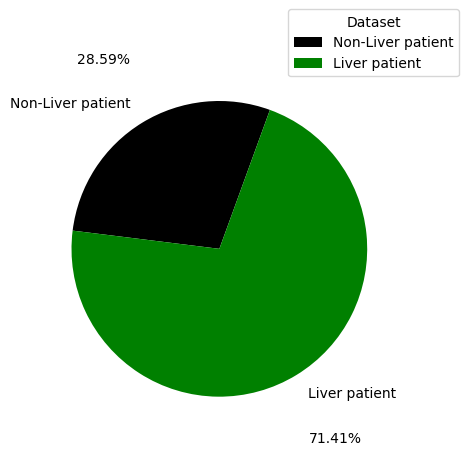

In [52]:
fig = plt.figure(figsize=(5,4))

# Collecting data locally
status_counts = merge_data.groupBy('Status').count().collect()

# Extracting counts and labels
counts = [row['count'] for row in status_counts]
labels = [row['Status'] for row in status_counts]

plt.pie(counts,labels=['Non-Liver patient','Liver patient'],radius=1.2,
colors = ['black','green'],autopct='%1.2f%%',pctdistance=1.5 ,labeldistance=1.15,startangle =70)

plt.legend(title = 'Dataset',loc='upper right', bbox_to_anchor=(1.3,1.3))
plt.show()

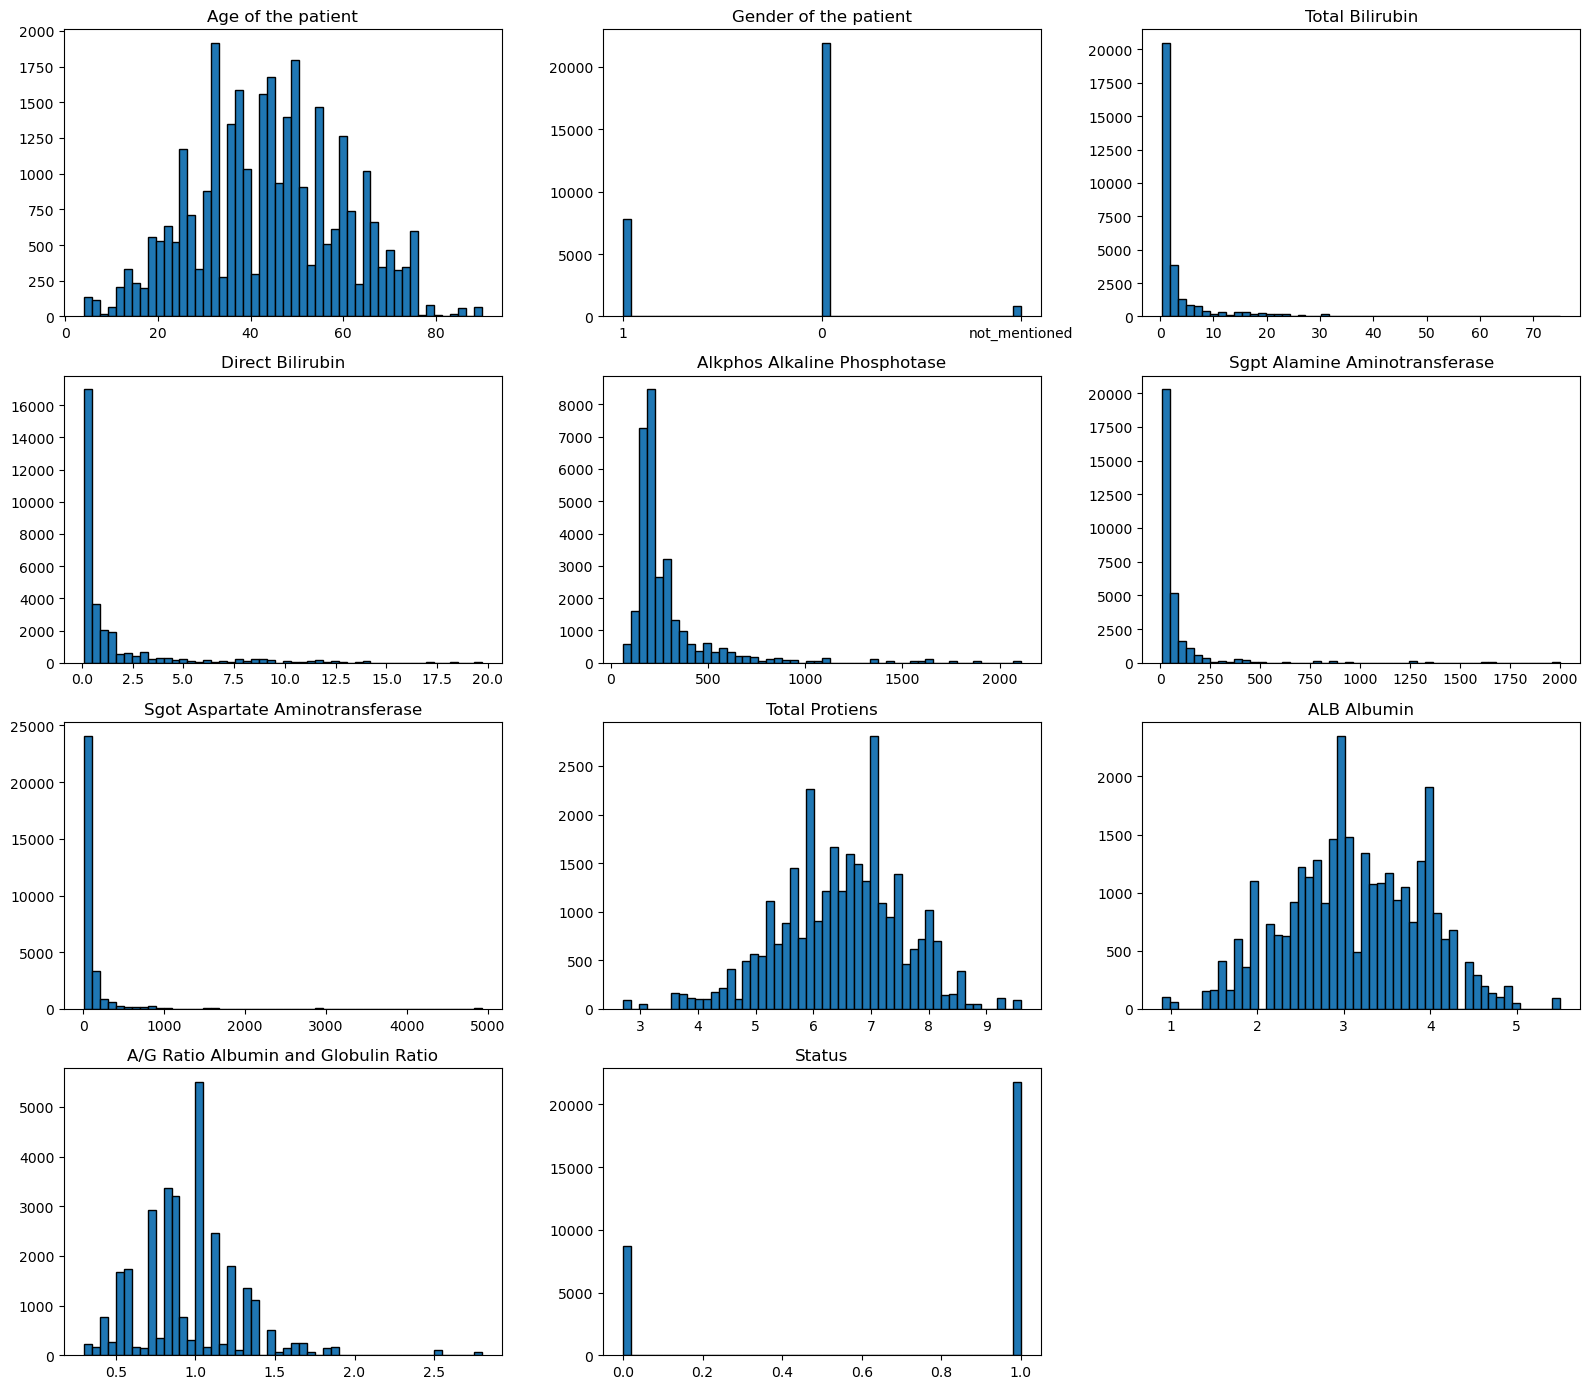

In [53]:
numb_col = ['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
            'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
            'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
            'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Status']

plt.figure(figsize=(16, 14))

for i, col in enumerate(numb_col):
    plt.subplot(4, 3, i + 1)
    data = merge_data.select(col).toPandas()
    plt.hist(data[col], bins=50, histtype='bar', edgecolor='k')
    plt.title(col)
    plt.tight_layout()

plt.show()

form the above plot we can infer that there are a lot of discrapnacies in the data and is not balanced

In [54]:
# Calculate target distribution for 'Status'
target_distribution_status = merge_data.groupBy('Status').count().orderBy('Status')
target_distribution_status.show()

# Check for missing values and duplicates
is_dataset_balanced_status = target_distribution_status.selectExpr('min(count) / max(count) > 0.8 as is_balanced').collect()[0]['is_balanced']

print("\nTarget Distribution for 'Status' where 1 indicates Liver Patient, 0 indicates not Liver Patient:")
target_distribution_status.show()

# Calculate target distribution for 'Gender of the patient'
target_distribution_gender = merge_data.groupBy('Gender of the patient').count().orderBy('Gender of the patient')
target_distribution_gender.show()

# Check for missing values and duplicates
is_dataset_balanced_gender = target_distribution_gender.selectExpr('min(count) / max(count) > 0.8 as is_balanced').collect()[0]['is_balanced']

print("\nTarget Distribution for 'Gender of the patient' where 1 indicates Female Patient, 0 indicates not Male Patient:")
target_distribution_gender.show()

# Check overall dataset balance
print("\nIs the dataset balanced for 'Status'?", is_dataset_balanced_status)
print("Is the dataset balanced for 'Gender of the patient'?", is_dataset_balanced_gender)

+------+-----+
|Status|count|
+------+-----+
|     0| 8728|
|     1|21802|
+------+-----+



Target Distribution for 'Status' where 1 indicates Liver Patient, 0 indicates not Liver Patient:

+------+-----+
|Status|count|
+------+-----+
|     0| 8728|
|     1|21802|
+------+-----+

+---------------------+-----+
|Gender of the patient|count|
+---------------------+-----+
|                    0|21908|
|                    1| 7774|
|        not_mentioned|  848|
+---------------------+-----+



Target Distribution for 'Gender of the patient' where 1 indicates Female Patient, 0 indicates not Male Patient:

+---------------------+-----+
|Gender of the patient|count|
+---------------------+-----+
|                    0|21908|
|                    1| 7774|
|        not_mentioned|  848|
+---------------------+-----+



Is the dataset balanced for 'Status'? False

Is the dataset balanced for 'Gender of the patient'? False

Absolute correlation values with 'Status':

+--------------------+
|          abs_Status|
+--------------------+
|                 1.0|
|  0.2491615637424513|
| 0.22589754651087654|
|  0.1818453233763906|
| 0.16485996852967905|
| 0.15993414483036744|
|  0.1575932389289903|
| 0.15743506593909826|
|0.030448649739027875|
|0.004302244696925279|
+--------------------+



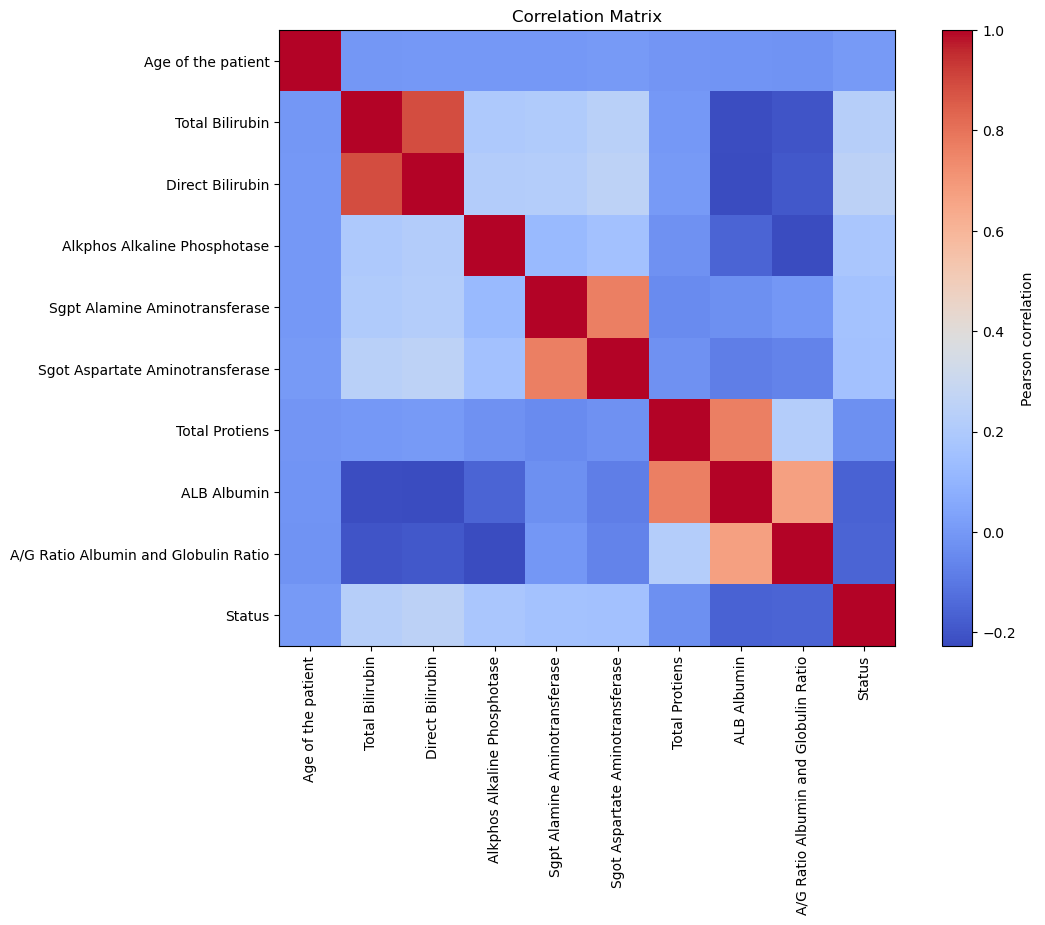

In [55]:
# Columns to include in correlation analysis
cols_to_include = ['Age of the patient', 'Total Bilirubin',
                   'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
                   'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
                   'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Status']

# Assemble features into a single vector
vector_assembler = VectorAssembler(inputCols=cols_to_include, outputCol="features")
assembled_data = vector_assembler.transform(merge_data).select("features")

# Calculate correlation matrix
correlation_matrix = Correlation.corr(assembled_data, "features", method="pearson")
correlation_array = correlation_matrix.collect()[0]["pearson({})".format("features")]

# Convert correlation array to DataFrame
correlation_df = spark.createDataFrame(correlation_array.toArray().tolist(), cols_to_include)

# Calculate correlation with "Status" column
liver_d_corr = correlation_df.selectExpr("abs(Status) as abs_Status").orderBy("abs_Status", ascending=False)

print("Absolute correlation values with 'Status':")
liver_d_corr.show()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
plt.imshow(correlation_array.toArray(), cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Pearson correlation")
plt.title("Correlation Matrix")
plt.xticks(range(len(cols_to_include)), cols_to_include, rotation=90)
plt.yticks(range(len(cols_to_include)), cols_to_include)
plt.show()

from this we can observe that ```Total Bilirubin``` and ```Total Bilirubin``` are highly correlated to each other and are the most dominat corr with status

# Are there duplicate records?

In [56]:
from pyspark.sql.functions import col

# Numerical columns for detecting duplicates
num_cols_for_duplicates = ['Age of the patient', 'Total Bilirubin',
                           'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
                           'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
                           'Total Protiens', 'ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio', 'Status']

# Check for duplicates
has_duplicates = merge_data.select([col(col_name).cast("double") for col_name in num_cols_for_duplicates]).dropDuplicates().count() < merge_data.count()

print("Are there duplicate records?", has_duplicates)

# Selecting duplicate records
if has_duplicates:
    duplicate_records = merge_data.groupBy([col(col_name).cast("double") for col_name in num_cols_for_duplicates]).count().filter("count > 1")
    duplicate_records.show(truncate=False)


Are there duplicate records? True

+----------------------------------+-------------------------------+--------------------------------+--------------------------------------------+---------------------------------------------+-----------------------------------------------+------------------------------+---------------------------+----------------------------------------------------+----------------------+-----+
|CAST(Age of the patient AS DOUBLE)|CAST(Total Bilirubin AS DOUBLE)|CAST(Direct Bilirubin AS DOUBLE)|CAST(Alkphos Alkaline Phosphotase AS DOUBLE)|CAST(Sgpt Alamine Aminotransferase AS DOUBLE)|CAST(Sgot Aspartate Aminotransferase AS DOUBLE)|CAST(Total Protiens AS DOUBLE)|CAST(ALB Albumin AS DOUBLE)|CAST(A/G Ratio Albumin and Globulin Ratio AS DOUBLE)|CAST(Status AS DOUBLE)|count|
+----------------------------------+-------------------------------+--------------------------------+--------------------------------------------+---------------------------------------------+--------------------------------------------

In [63]:
merge_data=merge_data.distinct()

we also know that ```Total Bilirubin``` and ```Total Bilirubin``` are highly correlated to each other and are the most dominat we can drop any one of the col

In [64]:
merge_data = merge_data.drop('Total Bilirubin')

In [66]:
merge_data.show()

+------------------+---------------------+------------------+----------------------------+-----------------------------+-------------------------------+--------------+-----------------+------------------------------------+---------+----------+--------------+----------+------+
|Age of the patient|Gender of the patient|  Direct Bilirubin|Alkphos Alkaline Phosphotase|Sgpt Alamine Aminotransferase|Sgot Aspartate Aminotransferase|Total Protiens|      ALB Albumin|A/G Ratio Albumin and Globulin Ratio|City_Code|State_Code|    State Name| City name|Status|
+------------------+---------------------+------------------+----------------------------+-----------------------------+-------------------------------+--------------+-----------------+------------------------------------+---------+----------+--------------+----------+------+
|              44.0|                    1|               0.6|                       298.0|                        378.0|                          602.0|           6.6|  

# Any affect of age group on the occurrence of liver disease.

In [67]:
correlation_matrix = merge_data.select("Age of the patient", "Status").toPandas().corr(method='pearson')
liver_d_corr_with_age = correlation_matrix["Status"].sort_values(ascending=False)
print(liver_d_corr_with_age)
print("\nAny affect of age group on the occurrence of liver disease?", liver_d_corr_with_age["Age of the patient"] > 0.1)


Status                1.000000
Age of the patient    0.003524
Name: Status, dtype: float64

Any affect of age group on the occurrence of liver disease? False

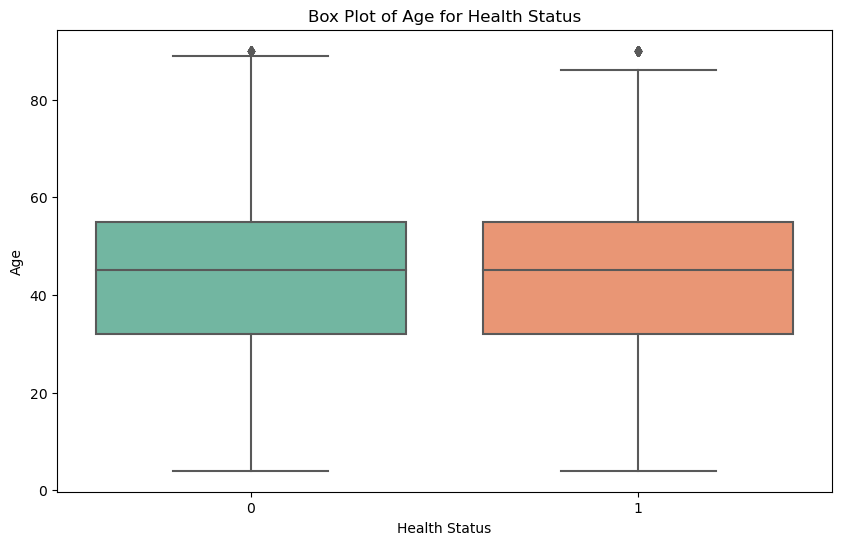

In [68]:
# Box plot of age distribution for each health status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Age of the patient', data=merge_clean_data, palette='Set2')
plt.title('Box Plot of Age for Health Status')
plt.xlabel('Health Status')
plt.ylabel('Age')
plt.show()

Also from the box plot we can infer as this indipendence becaouse the distribution follows a normal curve

# Any relationship between diff factor 

Status                                  1.000000
Direct Bilirubin                        0.248788
Alkphos Alkaline Phosphotase            0.181248
Sgpt Alamine Aminotransferase           0.164754
ALB Albumin                             0.159880
Sgot Aspartate Aminotransferase         0.157600
A/G Ratio Albumin and Globulin Ratio    0.157516
Total Protiens                          0.030247
Age of the patient                      0.003524
Name: Status, dtype: float64

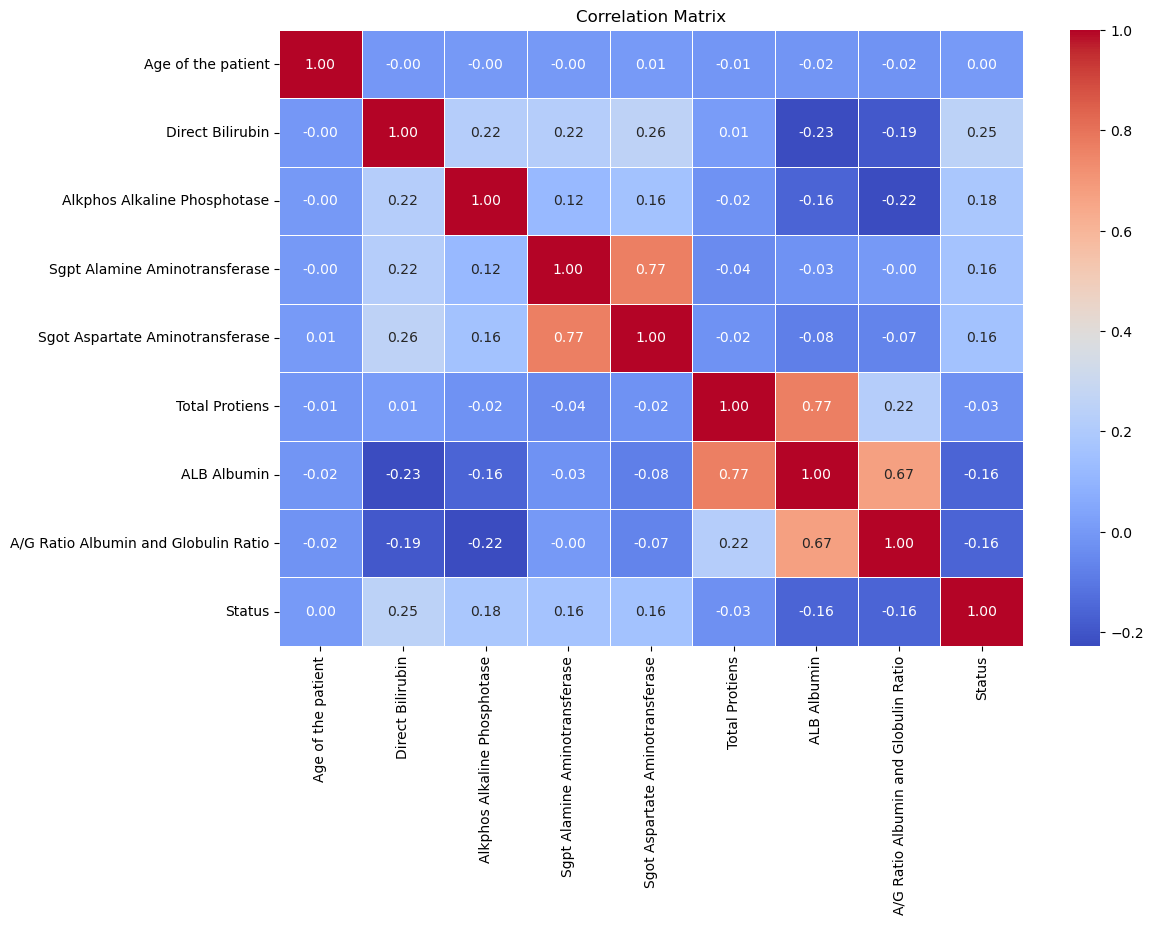

In [69]:
# Calculate correlation matrix
correlation_matrix = merge_data.toPandas().corr(method='pearson')

# Calculate absolute correlation with 'Status' column
liver_d_corr = correlation_matrix["Status"].abs().sort_values(ascending=False)
print(liver_d_corr)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [71]:
from pyspark.sql.functions import col

# Select relevant columns and calculate correlation matrix
correlation_matrix = merge_data.select("Age of the patient", "Status").toPandas().corr(method='pearson')

# Extract correlation with 'Status' column
liver_d_corr_with_age = correlation_matrix["Status"].sort_values(ascending=False)
print(liver_d_corr_with_age)

# Check if there's a significant effect of age group on the occurrence of liver disease
significant_effect = liver_d_corr_with_age["Age of the patient"] > 0.1
print("\nAny effect of age group on the occurrence of liver disease?", significant_effect)


Status                1.000000
Age of the patient    0.003524
Name: Status, dtype: float64

Any effect of age group on the occurrence of liver disease? False

In [78]:
merge_data.show()

+------------------+---------------------+------------------+----------------------------+-----------------------------+-------------------------------+--------------+-----------------+------------------------------------+---------+----------+--------------+----------+------+
|Age of the patient|Gender of the patient|  Direct Bilirubin|Alkphos Alkaline Phosphotase|Sgpt Alamine Aminotransferase|Sgot Aspartate Aminotransferase|Total Protiens|      ALB Albumin|A/G Ratio Albumin and Globulin Ratio|City_Code|State_Code|    State Name| City name|Status|
+------------------+---------------------+------------------+----------------------------+-----------------------------+-------------------------------+--------------+-----------------+------------------------------------+---------+----------+--------------+----------+------+
|              44.0|                    1|               0.6|                       298.0|                        378.0|                          602.0|           6.6|  